In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv

In [2]:
def get_list(filename,filter):
    """
        filename: .csv文件
        filter: filter=1: score只有正负，没有大小
        return: score_test, 
    """
    with open(filename, 'r', encoding='utf-8') as f:
        reader=csv.reader(f)
        score=[row[-1] for row in reader][1:]
    score=[eval(i) for i in score]
    if filter==1:
        for i in range(0,len(score)):
            if score[i]>0:
                score[i]=1
            elif score[i]<0:
                score[i]=-1

    with open(filename, 'r', encoding='utf-8') as f:
        reader=csv.reader(f)
        is_original=[row[-2] for row in reader][1:]
    
    return score, is_original

In [6]:
# _老番茄_
file_test='lfq_with_score.csv' # 算法计算出的得分文件
file_real='lfq_with_score_mark.csv' # 真实得分文件
score_test,is_original=get_list(file_test,0)
score_read=get_list(file_test,0)[0]

# 积极情感值列表
positive_list=[score_test[i] for i in range(0, len(score_test)) if score_test[i]>0]
positive_len=len(positive_list)

# 消极情感值列表
negative_list=[score_test[i] for i in range(0, len(score_test)) if score_test[i]<0]
negative_len=len(negative_list)

# 原创列表
original_list=[score_test[i] for i in range(0, len(score_test)) if is_original[i]=='True']
original_len=len(original_list)

# 转发列表
repost_list=[score_test[i] for i in range(0, len(score_test)) if is_original[i]=='False']
repost_len=len(repost_list)

In [7]:
def data_analysis(l, list_name, color='#FF5809'):
    """
        l: list列表
        list_name: str 列表名称
    """
    max_num=max(l)
    min_num=min(l)
    mean=np.mean(l)
    var=np.var(l)
    bins=20
    plt.hist(l,bins=bins,facecolor=color,density=True)
    plt.savefig(list_name+'.jpg')
    return max_num,min_num,mean,var

In [8]:
print(positive_len,negative_len,original_len,repost_len)

39 29 64 7


(30.602560582269806, 0, 12.513559997920515, 109.05868326789142)

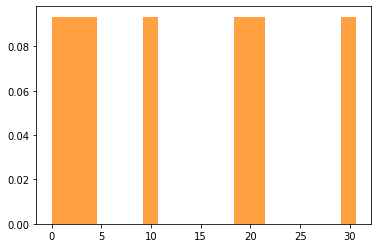

In [9]:
data_analysis(repost_list,'lfq_repost',color='#FFA042')

(14.915809818248997,
 -13.527011818393001,
 0.2954634748614381,
 16.779417134090778)

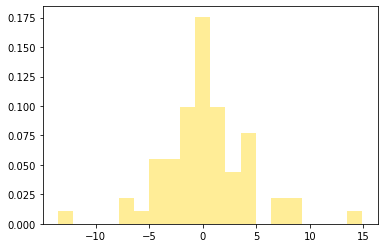

In [10]:
data_analysis(original_list,'lfq_original',color='#FFED97')

(30.602560582269806, 0.1469939176170001, 4.786991824807055, 40.82981896232055)

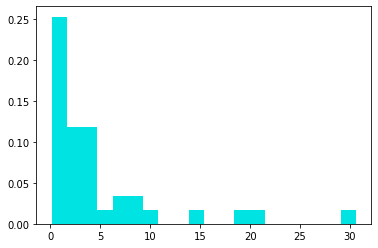

In [11]:
data_analysis(positive_list,'lfq_positive',color='#00E3E3')

(-0.19383707691500018,
 -13.527011818393001,
 -2.765106854858602,
 7.972997968661239)

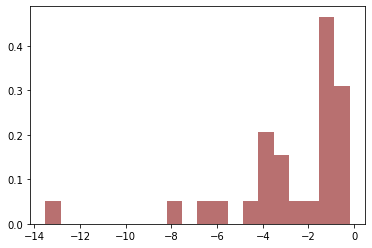

In [12]:
data_analysis(negative_list,'lfq_negative',color='#B87070')

(30.602560582269806, -13.527011818393001, 1.50006454051515, 39.1442413146621)

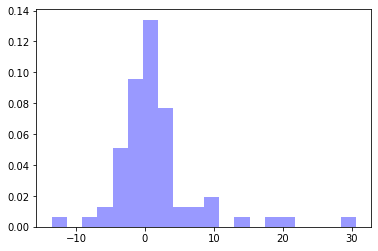

In [13]:
data_analysis(score_test,'lfq_all',color='#9999ff')